# Выявление закономерностей, определяющих успешность игры

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Цель проекта - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Для исследования предоставлены данные до 2016 г.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение данных из файла

Импортируем библиотеки, с которыми будем работать

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from scipy import stats as st
import warnings

Сохраняем данные в переменную df

In [2]:
df = pd.read_csv('/datasets/games.csv')
display(df.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Посмотрим общую информацию о данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим описательную статистику по каждому столбцу датафрейма

In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод

В таблице "Данные о продажах игр" 16715 строк и 11 столбцов. В 5 столбцах тип данных - object, в 6 столбцах - float64.
Для дальнейшей работы с таблицей нужно привести названия столбцов к единому стилю. Количество значений в столбцах различается. Значит, в данных есть пропущенные значения. 

## Предобработка данных

### Стиль заголовков

Посмотрим названия столбцов нашей таблицы

In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Приведем названия столбцов к нижнему регистру.

In [6]:
df.columns = df.columns.str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Пропуски значений

Посчитаем количество пропущенных значений в каждом из столбцов датафрейма.

In [7]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбце "Название игры" есть два пропущенных значения, посмотрим на строки без названий игры.

In [8]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Про эти загадочные две игры известно очень мало:
* платформа, на которой вышли игры
* год выпуска 
* продажи по регионам.

Удалим эти две строки, поскольку они не несут никакой существенной информации для целей исследования.

In [9]:
df = df.dropna(subset=['name'])
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Теперь посмотрим на несколько строк с пропущенными значениями в столбце "Год выпуска". 

In [10]:
df[df['year_of_release'].isna()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14126,Housekeeping,DS,NaN,Action,0.00,0.00,0.04,0.00,NaN,NaN,NaN
7210,LEGO Harry Potter: Years 5-7,PC,NaN,Action,0.05,0.14,0.00,0.03,80.0,8.5,E10+
4818,LEGO Harry Potter: Years 5-7,3DS,NaN,Action,0.18,0.19,0.00,0.03,71.0,6.5,E10+
8740,Home Run,2600,NaN,Sports,0.14,0.01,0.00,0.00,NaN,NaN,NaN
14749,Tom and Jerry in War of the Whiskers,XB,NaN,Fighting,0.02,0.01,0.00,0.00,NaN,NaN,NaN
1699,Hitman 2: Silent Assassin,XB,NaN,Action,0.76,0.38,0.00,0.05,84.0,8,M
14950,Combat Wings: The Great Battles of WWII,Wii,NaN,Simulation,0.02,0.00,0.00,0.00,NaN,NaN,NaN
9380,Transworld Surf,XB,NaN,Sports,0.10,0.03,0.00,0.00,76.0,tbd,T
15816,Without Warning,XB,NaN,Shooter,0.01,0.00,0.00,0.00,45.0,2,M
12734,Mobile Ops: The One Year War,X360,NaN,Simulation,0.00,0.00,0.06,0.00,NaN,NaN,NaN


Всего пропусков в столбце "Год выпуска" 269. Восстановить такие данные достоверно мы не можем, поэтому удалим строки без указания года выпуска игры.

In [11]:
df = df.dropna(subset=['year_of_release'])
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Посмотрим на значения рейтинга от организации ESRB.

In [12]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Рейтинговая доска развлекательного программного обеспечения (ESRB) была основана и начала оценивать игры в 1994 году. Это саморегулируемая организация, которая присваивает возрастные рейтинги и рейтинги контента и обеспечивает соблюдение принятых в отрасли руководящих принципов рекламы компьютерных и видеоигр в Соединенных Штатах и Канаде.

Рейтинг "K-A" (Kids to Adults) для детей и взрослых: Игры, содержащие контент, подходящий для широкой аудитории. Этот рейтинг использовался до 1998 года, когда он был переименован в E. 

Рейтинг "RP" (Rating Pending) рейтинг ожидается: Продукт был отправлен в ESRB и ожидает присвоение рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза.

Заменим значения K-A на E в столбце "Рейтинг от организации ESRB", а значения RP на "unknown".

In [13]:
disct_replace = {'K-A': 'E', 'RP': 'unknown'}

df['rating'] = df['rating'].replace(disct_replace)
df['rating'].value_counts()

E          3924
T          2905
M          1536
E10+       1393
EC            8
unknown       1
AO            1
Name: rating, dtype: int64

В столбце "Рейтинг ассоциации ESRB" заменим пропуски на "unknown". 

In [14]:
df['rating'] = df['rating'].fillna('unknown')

df['rating'].value_counts()

unknown    6677
E          3924
T          2905
M          1536
E10+       1393
EC            8
AO            1
Name: rating, dtype: int64

Посмотрим на значения в столбце "Оценка пользователей".

In [15]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.9       2
1.5       2
0.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Оценка "tbd" (to be determined - для определения) - означает, что на момент сбора данных не было оценки для игры. Заменим все значения "tbd" на NaN.

In [16]:
df.loc[df['user_score'] == "tbd", 'user_score'] = np.nan
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Пропущенные данные об оценках критиков и оценках пользователей также не можем достоверно восстановить на основе имеющейся информации, поэтому оставим без изменения эти строки. Вероятно пропуски в оценках появились при сборе информации. 

### Тип данных

Заменим тип данных на категориальный в столбцах:
* "Название игры",
* "Платформа",
* "Жанр игры", 
* "Рейтинг от организцаии ESRB"

В столбце "Год выпуска" заменим тип данных на целочисленный, потому что год не может быть дробным.

В столбце "Оценка пользователей" заменим тип данных на вещественный.

In [17]:
df['name'] = df['name'].astype('category')
df['platform'] = df['platform'].astype('category')
df['genre'] = df['genre'].astype('category')
df['rating'] = df['rating'].astype('category')
df['year_of_release'] = df['year_of_release'].astype('int64')
df['user_score'] = df['user_score'].astype('float16')

# проверка замены
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null category
platform           16444 non-null category
year_of_release    16444 non-null int64
genre              16444 non-null category
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float16
rating             16444 non-null category
dtypes: category(4), float16(1), float64(5), int64(1)
memory usage: 1.4 MB


### Дубликаты

In [18]:
# проверка на дубликаты
df.duplicated().sum()

0

Явных дубликатов нет, проверим на неявные дубликаты столбец "Название платформы".

In [19]:
df['platform'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

Посмотрим есть ли неявные дубликаты в столбце "Жанр игры".

In [20]:
df['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Все названия жанров уникальны. 

### Дополнительные расчёты

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец "Общий объем продаж".

In [21]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
10866,Bladestorm: The Hundred Years' War,X360,2007,Action,0.08,0.01,0.0,0.01,63.0,6.800781,T,0.10
9376,NHL 2K9,PS2,2008,Sports,0.07,0.05,0.0,0.02,NaN,6.699219,E10+,0.14
1795,Royal Palace of White Sword and The City of Ge...,PS2,2005,Role-Playing,0.00,0.51,0.0,0.62,NaN,NaN,unknown,1.13
11603,Horrid Henry's Horrid Adventure,DS,2010,Adventure,0.00,0.07,0.0,0.01,NaN,NaN,unknown,0.08
4047,Backyard Baseball,PS2,2004,Sports,0.24,0.19,0.0,0.06,NaN,7.199219,E,0.49


### Вывод

В ходе предобработки данных мы обнаружили несколько проблем:

- нарушения в стиле заголовков,
- пропущенные значения,
- некорректный тип данных.

Мы исправили заголовки, чтобы упростить работу с таблицей, заменили тип данных. 

Пропущенные значения в столбцах с оценками пользователей и критиков восстановить достоверно невозможно, данные оставили без изменений.

Теперь данные готовы к дальнейшему анализу.

## Исследовательский анализ данных

### Количество выпущенных игр в разные годы

Посмотрим сколько игр выпустили в разные годы и насколько важны данные за все периоды. Построим график "Количество выпущенных игр по годам".

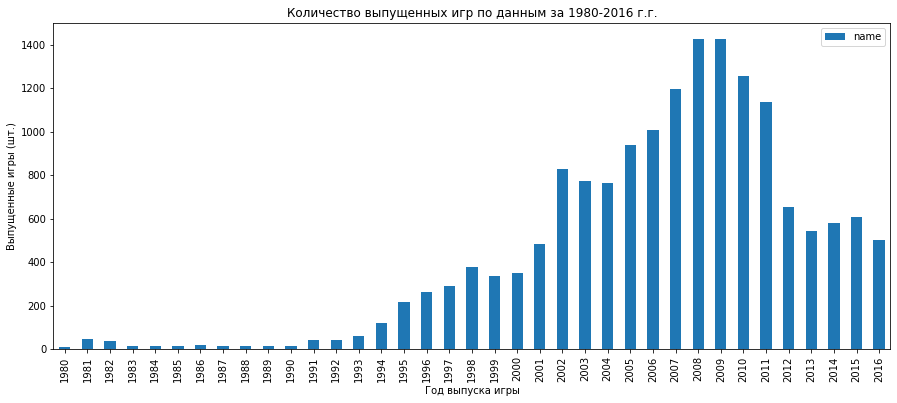

In [22]:
(df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', figsize=(15, 6)))

plt.xlabel('Год выпуска игры')
plt.ylabel('Выпущенные игры (шт.)')
plt.title('Количество выпущенных игр по данным за 1980-2016 г.г.')
plt.show()

Как мы видим на графике в 1990-х годах началось активное развитие игровой индустрии - количество выпущенных игр растет с каждым годом, пик популярности приходится на 2008-2009 годы. К 2016 году наблюдаем снижение популярности видеоиг, возможно это связано с развитием индустрии мобильных игр.

### Изменение продаж по платформам

Посмотрим как менялись продажи по платформам, для этого построим график "Продажи в разбивке по платформам".

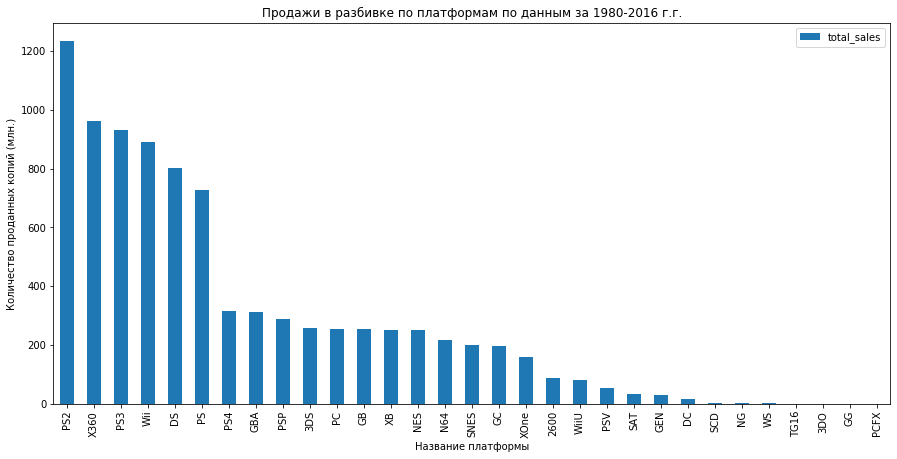

In [23]:
platform_sales = df.pivot_table(index='platform', 
                           values='total_sales', 
                           aggfunc='sum').sort_values(by='total_sales',ascending=False)
platform_sales.plot(kind='bar', figsize=(15, 7))

plt.xlabel('Название платформы')
plt.ylabel('Количество проданных копий (млн.)')
plt.title('Продажи в разбивке по платформам по данным за 1980-2016 г.г.')
plt.show()

Выберем платформы с наибольшими суммарными продажами.

In [24]:
top_platforms = platform_sales.groupby('platform')['total_sales'].agg(sum).sort_values(ascending=False).head(6).reset_index()
top_platforms_list = list(top_platforms['platform'])
platform_sales.query('platform in @top_platforms_list')

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


Построим график "Распределение продаж на каждой платформе по годам".

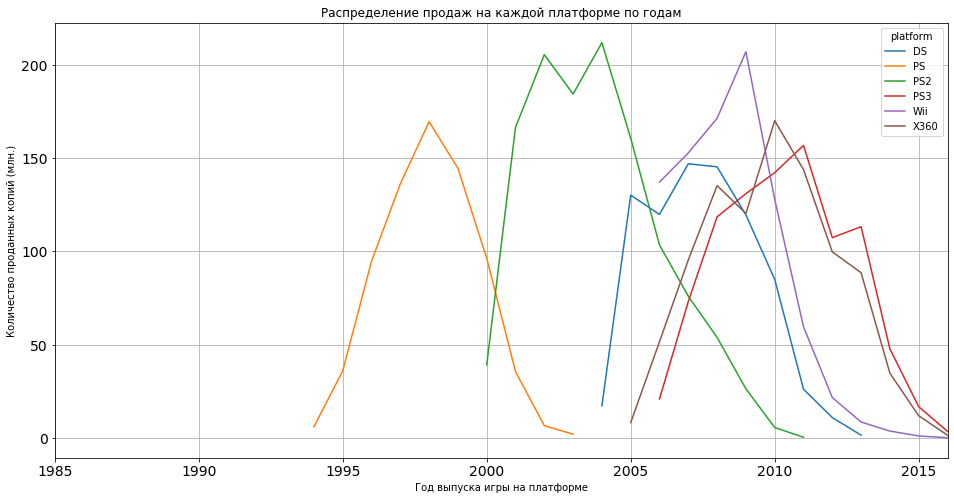

In [25]:
df.query('platform in @top_platforms_list').pivot_table(index='year_of_release', columns='platform',
                                values='total_sales',aggfunc=("sum")).plot(grid=True,
                                    figsize=(16, 8), fontsize=(14))
plt.xlabel('Год выпуска игры на платформе')
plt.ylabel('Количество проданных копий (млн.)')
plt.title('Распределение продаж на каждой платформе по годам')
plt.show()

Наибольшие суммарные продажи наблюдаем у 6 игровых платформ:
1. PS2,
2. X360,
3. Wii,
4. PS3,
5. DS,
6. PS.

Судя по графику, в начале 2000-х годов платформа PS2 была на пике популярности. Далее наблюдаем спад в продажах, связанный скорее всего с выходом игр на новых платформах. 

Посмотрим за какой актуальный срок появляются и исчезают новые платформы, для этого построим сводную таблицу по названию платформы и по годам, в которых выпускались игры на этой платформе.

In [26]:
current_term = df.pivot_table(index=('platform','year_of_release'), aggfunc=('count')).reset_index()
current_term

,platform,year_of_release,critic_score,eu_sales,genre,jp_sales,na_sales,name,other_sales,rating,total_sales,user_score
0,2600,1980,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,0.0
1,2600,1981,0.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,0.0
2,2600,1982,0.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,0.0
3,2600,1983,0.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,0.0
4,2600,1984,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233,XB,2008,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
234,XOne,2013,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,17.0
235,XOne,2014,43.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,44.0
236,XOne,2015,52.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,55.0


Теперь сгруппируем данные и узнаем продолжительность жизни каждой из платформ.

In [27]:
current_term = current_term.groupby('platform')['year_of_release'].agg('count').reset_index()
current_term

,platform,year_of_release
0,2600,10
1,3DO,2
2,3DS,6
3,DC,7
4,DS,11
5,GB,13
6,GBA,8
7,GC,7
8,GEN,5
9,GG,1


Найдем среднее значение - за какой характерный срок появляются новые и исчезают старые платформы.

In [28]:
current_term['year_of_release'].median()

7.0

**Жизненный цикл одной платформы в среднем составляет 7 лет.**
С учетом того, что средний жизненный цикл одной платформы составляет 7 лет и что за 2016 год у нас есть неполные данные, возьмём для анализа период с 2013 по 2015 годы включительно. Данные за предыдущие годы учитывать в работе не будем, поэтому создадим отдельную таблицу с данными актуального периода и сохраним её в переменную df_current.

In [29]:
df_current = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2015)]
df_current

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.203125,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.101562,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.296875,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16682,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.601562,M,0.01


Рассмотрим какие платформы лидируют по продажам, растут или падают.

### Потенциально прибыльные платформы

Построим график "Продажи в разбивке по платформам".

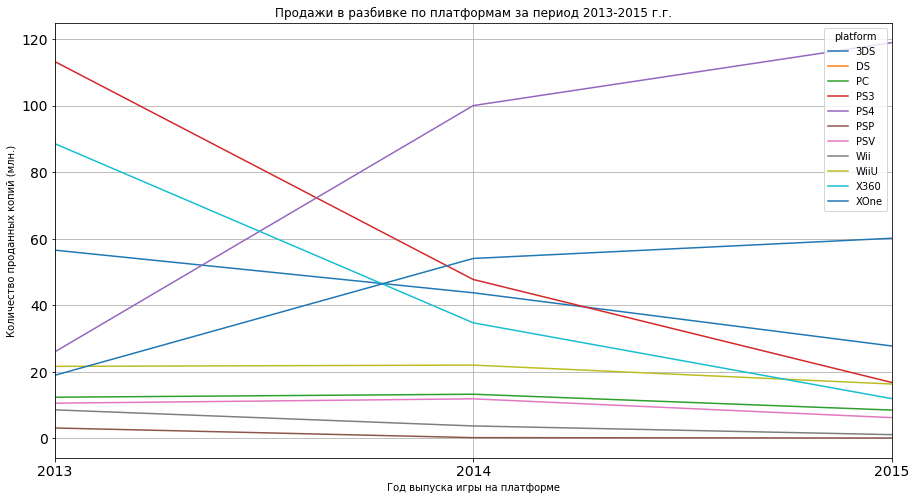

In [30]:
df_current.pivot_table(index='year_of_release', columns='platform',
                                values='total_sales',aggfunc=('sum')).plot(grid=True,
                                    figsize=(15, 8), fontsize=(14))
plt.xticks([2013, 2014, 2015])
plt.xlabel('Год выпуска игры на платформе')
plt.ylabel('Количество проданных копий (млн.)')
plt.title('Продажи в разбивке по платформам за период 2013-2015 г.г.')
plt.show()

Как мы видим на графике к 2015 году продажи по всем игровым платформам идут на спад. Это связано и с жизненным циклом платформы и с появлением новых платформ PS4 и XOne, продажи которых стартовали с 22 и 17 млн.проданных копий соответственно. Будем считать эти две платформы потенциально прибыльными, продажи которых продолжат расти.

### Глобальные продажи игр в разбивке по платформам

Построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам.

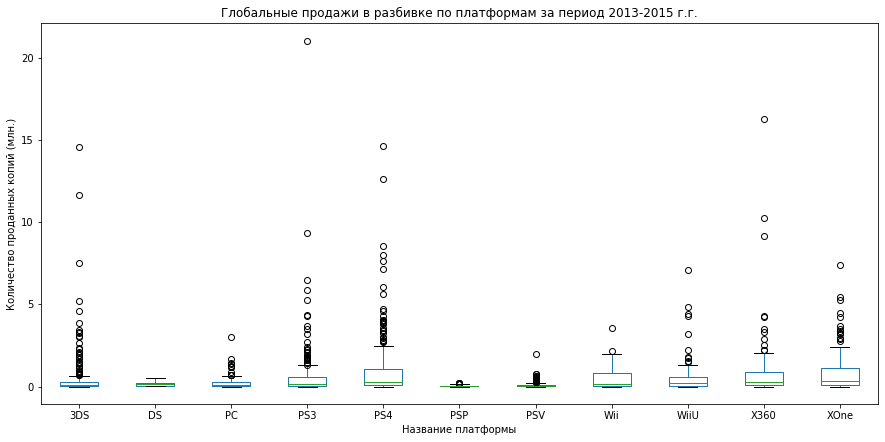

In [31]:
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

df_current.pivot_table(index='name',
                      columns='platform', 
                      values='total_sales',
                      aggfunc='sum').plot(kind='box', figsize=(15, 7))

plt.xlabel('Название платформы')
plt.ylabel('Количество проданных копий (млн.)')
plt.title('Глобальные продажи в разбивке по платформам за период 2013-2015 г.г.')
plt.show()

Как мы видим на графике много значений выбиваются у самых популярных платформ. Ограничим значения по оси У для удобного визуального восприятия.

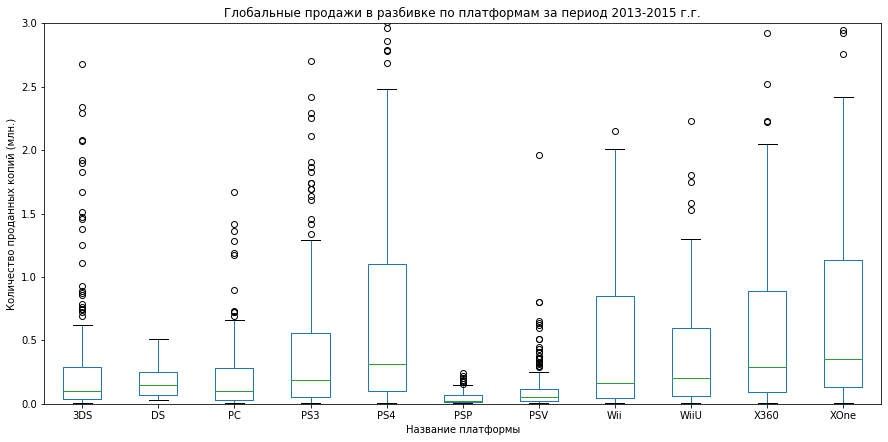

In [32]:
df_current.pivot_table(index='name',
                      columns='platform', 
                      values='total_sales',
                      aggfunc='sum').plot(kind='box', figsize=(15, 7), ylim = (0,3))

plt.xlabel('Название платформы')
plt.ylabel('Количество проданных копий (млн.)')
plt.title('Глобальные продажи в разбивке по платформам за период 2013-2015 г.г.')
plt.show()

Судя по графику, лидеры по глобальным продажам - PS4, XOne и Wii. Менее популярные платформы: PSP и PSV.

### Взаимосвязь отзывов и продаж на одной из популярных платформ - PS4

Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для этого сделаем отбор по платформе и сохраним данные в переменную df_PS4.

In [33]:
df_PS4 = df_current[df_current['platform'] == 'PS4']
df_PS4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.296875,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.300781,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.699219,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
15556,Natsuiro High School: Seishun Hakusho,PS4,2015,Action,0.00,0.00,0.02,0.00,NaN,NaN,unknown,0.02
15762,Rabbids Invasion: The Interactive TV Show,PS4,2014,Misc,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
15943,Professional Farmer 2016,PS4,2015,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16158,Raven's Cry,PS4,2015,Role-Playing,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01


Построим диаграмму рассеяния "Зависимость глобальных продаж игр на платформе PS4 от оценок критиков и пользователей".

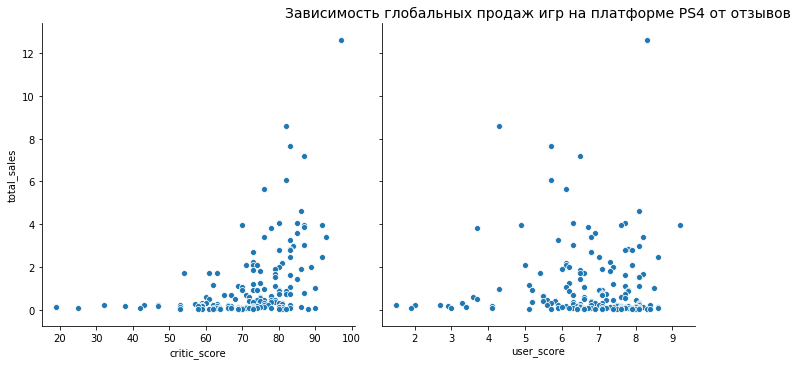

In [34]:
ax = sns.pairplot(df_PS4,                                
                  x_vars=['critic_score','user_score'],    
                  y_vars=['total_sales'],
                  kind='scatter',
                  height=5)

plt.title("Зависимость глобальных продаж игр на платформе PS4 от отзывов", size=14)
plt.show()

Посчитаем коэффициент корреляции Пирсона между отзывами и продажами.

In [35]:
df_PS4[['total_sales', 'critic_score','user_score']].corr()['total_sales']

total_sales     1.000000
critic_score    0.431848
user_score      0.024142
Name: total_sales, dtype: float64

На графике видно, что есть небольшая положительная корреляция между глобальными продажами игр на платформе PS4 и отзывами критиков. Коэффициент корреляции Пирсона, равный 0,43 также подтверждает эту зависимость.
А вот между глобальными продажами игр на платформе PS4 и отзывами пользователей корреляцию мы не видим. Это значит, что возможная взаимосвязь носит более сложный нелинейный характер или отсутсвует совсем. Коэффициент корреляции Пирсона в данном случае составляет 0,02.

### Взаимосвязь отзывов и продаж на остальных платформах

Теперь осмотрим как влияют на продажи отзывы пользователей и критиков по остальным платформам. Для этого сделаем отбор по всем платформам, кроме рассмотренной ранее PS4 и сохраним данные в переменную df_other.

In [36]:
df_other = df_current[df_current['platform'] != 'PS4']
df_other

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.203125,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.101562,M,16.27
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.599609,M,10.24
...,...,...,...,...,...,...,...,...,...,...,...,...
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16682,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.601562,M,0.01


Построим диаграмму рассеяния "Зависимость глобальных продаж игр от оценок критиков и пользователей на всех платформах, кроме PS4".

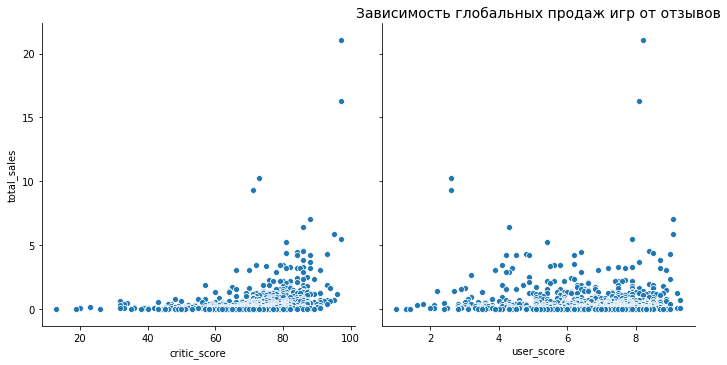

In [37]:
ax = sns.pairplot(df_other,                                
                  x_vars=['critic_score','user_score'],    
                  y_vars=['total_sales'],
                  kind='scatter',
                  height=5)

plt.title("Зависимость глобальных продаж игр от отзывов", size=14)
plt.show()

Посчитаем коэффициент корреляции Пирсона между отзывами и продажами по всем платформам, кроме PS4.

In [38]:
df_other[['total_sales', 'critic_score','user_score']].corr()['total_sales']

total_sales     1.000000
critic_score    0.303300
user_score     -0.001857
Name: total_sales, dtype: float64

На графике видно, что есть слабая положительная корреляция между глобальными продажами игр и отзывами критиков. Коэффициент корреляции Пирсона, равный 0,29 также подтверждает эту зависимость.
А вот между глобальными продажами игр и отзывами пользователей корреляцию мы не видим. Это значит, что возможная взаимосвязь носит более сложный нелинейный характер или отсутсвует совсем. Коэффициент корреляции Пирсона в данном случае составляет 0,08.

Можем сделать вывод, что оценки критиков и пользователей не имеют существенного влияния на глобальные продажи как на популярной платформе PS4, так и на остальных платформах.

### Общее распределение игр по жанрам

Посмотрим распределение игр по жанрам. Для этого построим график "Продажи в разбивке по жанрам за период 2009-2015 г.г.", возьмем для расчета медиану по столбцу "Общие продажи".

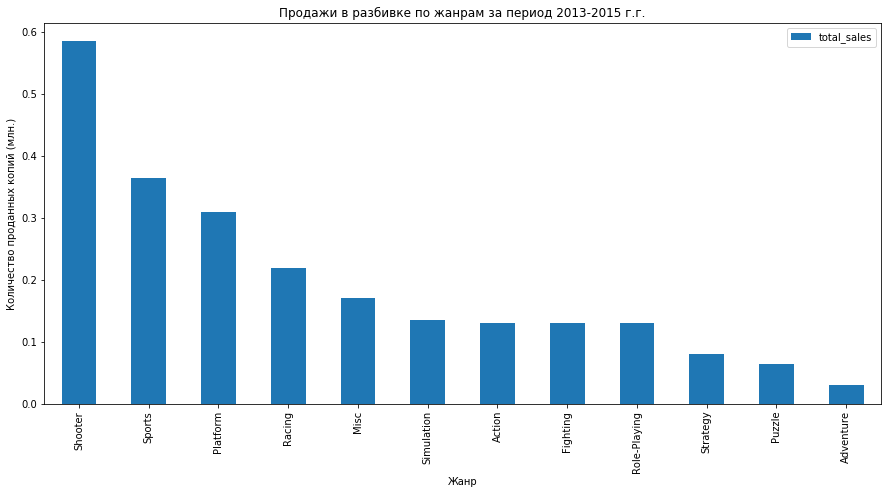

In [39]:
df_current.pivot_table(index='genre', 
                           values='total_sales', 
                           aggfunc='median').sort_values(by='total_sales',ascending=False).plot(kind='bar', figsize=(15, 7))

plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий (млн.)')
plt.title('Продажи в разбивке по жанрам за период 2013-2015 г.г.')
plt.show()

Судя по графику самые прибыльные жанры:

* Shooter,
* Sports,
* Platform,
* Racing,
* Misc.

Геймеры всего мира обожают стрелялки (более полумиллиона проданных копий в этом жанре), на втором месте спортивные игры, на третьем - платформеры. В основном предпочитают динамичные, легкие и впечатляющие игры. Стратегии и пазлы оказались наименее прибыльными.

### Вывод

1. После 2011 года наблюдаем спад интереса к компьютерным играм, возможно это связано с развитием рынка мобильных игр. 

2. В период с  2013 по 2015 г. лидирует PS4. 

3. Среди жанров самые популярные это стрелялки-шутеры и спортивные игры. 

4. Отзывы как критиков так и пользователей не имеют значительного влияния на продажи.

## Портрет пользователя каждого региона: Северная Америка, Европа, Япония

### ТОП-5 популярных платформ

Определим популярные платформы для каждого региона.

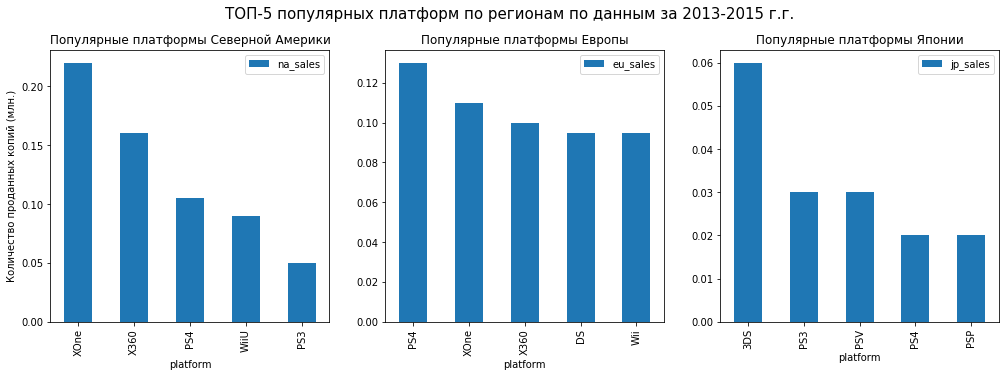

In [40]:
fig = plt.figure(figsize = (17, 5))
fig.suptitle('ТОП-5 популярных платформ по регионам по данным за 2013-2015 г.г.', fontsize=15, y=1)

ax_1 = fig.add_subplot(1, 3, 1)
ax_2 = fig.add_subplot(1, 3, 2)
ax_3 = fig.add_subplot(1, 3, 3)

ax_1.set(title = 'Популярные платформы Северной Америки')
ax_1.set(xlabel = 'Платформа')
ax_1.set(ylabel = 'Количество проданных копий (млн.)')
ax_2.set(title = 'Популярные платформы Европы')
ax_3.set(title = 'Популярные платформы Японии')

df_current.pivot_table(index='platform', values='na_sales', aggfunc='median').sort_values(by='na_sales', 
                                                  ascending=False).head(5).plot(kind='bar', y='na_sales', ax=ax_1)
df_current.pivot_table(index='platform', values='eu_sales', aggfunc='median').sort_values(by='eu_sales', 
                                                  ascending=False).head(5).plot(kind='bar', y='eu_sales', ax=ax_2)      
df_current.pivot_table(index='platform', values='jp_sales', aggfunc='median').sort_values(by='jp_sales', 
                                                  ascending=False).head(5).plot(kind='bar', y='jp_sales', ax=ax_3)                                   
                                   
plt.show()


На американском рынке лидером является XOne, на втором месте X360, далее PS4, WiiU и PS3.

В Европе с небольшим отрывом лидером становится PS4, на втором месте XOne, на третьем X360 и четвертое место, можно сказать делят DS и Wii.

На японском рынке ситуация отличается сильнее: возглавляет пятерку лидеров 3DS с суммарными продажами почти в три раза больше, чем у PS3 и PSV, расположенных на втором  и третьем месте соответственно. Популярная в Америке XOne даже не вошла в пятерку лидеров Японии. А вот популярная в Европе PS4 делит четвертое место с PSP среди японских геймеров.

### ТОП-5 популярных жанров

Рассмотрим теперь лидеров по жанрам в разных регионах.

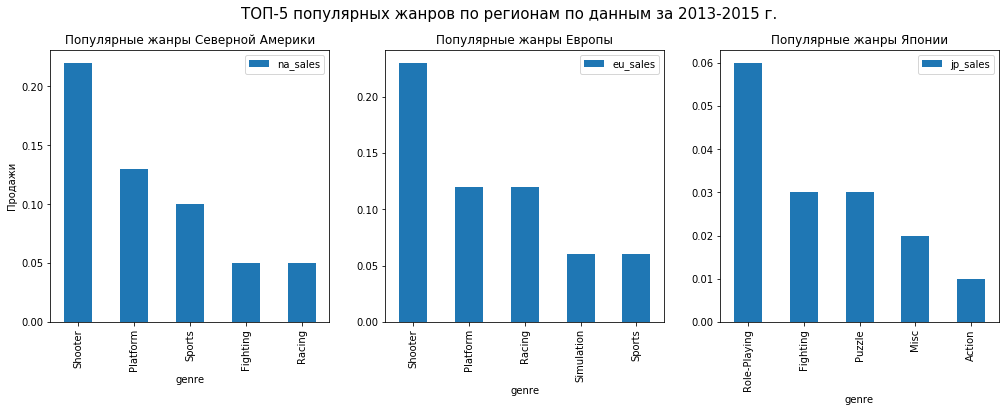

In [41]:
fig = plt.figure(figsize = (17, 5))
fig.suptitle('ТОП-5 популярных жанров по регионам по данным за 2013-2015 г.', fontsize=15, y=1)

ax_1 = fig.add_subplot(1, 3, 1)
ax_2 = fig.add_subplot(1, 3, 2)
ax_3 = fig.add_subplot(1, 3, 3)

ax_1.set(title = 'Популярные жанры Северной Америки')
ax_1.set(xlabel = 'Жанр игры')
ax_1.set(ylabel = 'Продажи')
ax_2.set(title = 'Популярные жанры Европы')
ax_3.set(title = 'Популярные жанры Японии')

df_current.pivot_table(index='genre', values='na_sales', aggfunc='median').sort_values(by='na_sales', 
                                                  ascending=False).head(5).plot(kind='bar', y='na_sales', ax=ax_1)
df_current.pivot_table(index='genre', values='eu_sales', aggfunc='median').sort_values(by='eu_sales', 
                                                  ascending=False).head(5).plot(kind='bar', y='eu_sales', ax=ax_2)      
df_current.pivot_table(index='genre', values='jp_sales', aggfunc='median').sort_values(by='jp_sales', 
                                                  ascending=False).head(5).plot(kind='bar', y='jp_sales', ax=ax_3)                                   
                                   
plt.show()


На америнском и европейском рынках пользователи предпочитают стрелялки, а вот в Японии картина совсем другая - лидером являются ролевые игры. Менее популярные жанры в Америке - платформеры, спортивные игры, а драки и гонки закрывают пятерку лидеров.

В Еврое платформеры и гонки одинаково популярны, за ними следуют симуляции и спортивные игры. 

В Японии предпочтения более разношерстные - драки и пазлы примерно на одном уровне, и менее популярны аркады и экшн.

### Влияние рейтинга ESRB на продажи в отдельном регионе

Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.

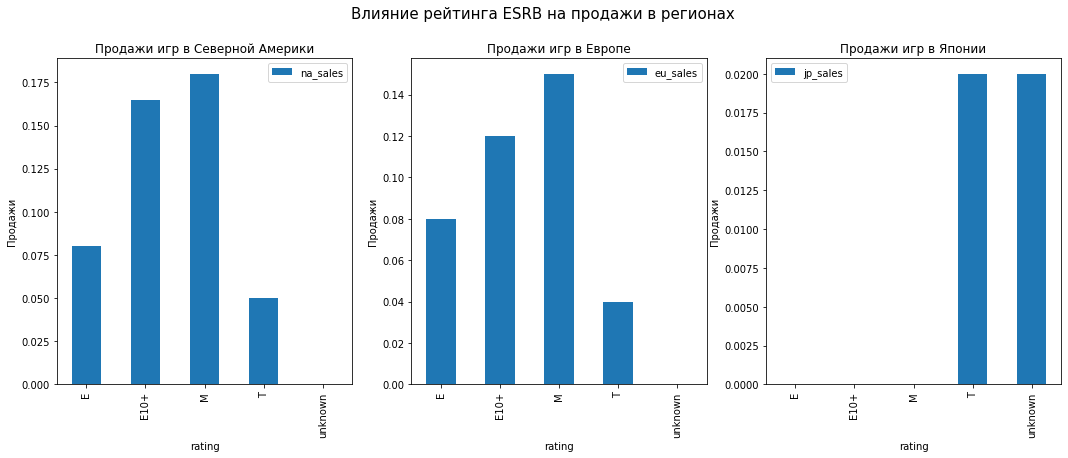

In [42]:
fig = plt.figure(figsize = (18, 6))
fig.suptitle('Влияние рейтинга ESRB на продажи в регионах', fontsize=15, y=1)

ax_1 = fig.add_subplot(1, 3, 1)
ax_2 = fig.add_subplot(1, 3, 2)
ax_3 = fig.add_subplot(1, 3, 3)

ax_1.set(title = 'Продажи игр в Северной Америки')
ax_1.set(ylabel = 'Продажи')

ax_2.set(title = 'Продажи игр в Европе')
ax_2.set(ylabel = 'Продажи')

ax_3.set(title = 'Продажи игр в Японии')
ax_3.set(ylabel = 'Продажи')

df_current.pivot_table(index='rating', values='na_sales', aggfunc='median').plot(kind='bar', y='na_sales', ax=ax_1)
df_current.pivot_table(index='rating', values='eu_sales', aggfunc='median').plot(kind='bar', y='eu_sales', ax=ax_2)      
df_current.pivot_table(index='rating', values='jp_sales', aggfunc='median').plot(kind='bar', y='jp_sales', ax=ax_3)                                   

plt.show()


Пользователи из Европы и Америки снова предпочитают схожие по рейтингу игры. А в Японии снова неожиданные результаты. Игры с рейтингом "Для взрослых" лидируют в Европе и Америке, следом идут игры с рейтингом "Для всех старше 10 лет". В Японии же одинаковы по популярности игры без рейтинга, который мы отметили "unlnown" и игры для подростков.

### Вывод

По результатам исследования мы видим сходство между европейскими и американскими игроками и существенные отличия от японских любителей компьютерных игр. Вероятнее всего это можно объяснить культурными отличиями страны и особенностями менталита.

## Проверка гипотез

Поверим гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Для этого сформулируем нулевую гипотезу, исходя из равенства средних двух генеральных совокупностей:

Н0: Средний пользовательский рейтинг платформ Xbox One и PC не различается,  
H1: Средний пользовательский рейтинг платформ Xbox One и PC различается.

Для проверки гипотезы используем специальный метод - t-тест, который не требует нормального распределения для генеральных совокупностей.

In [43]:
df_xone = df_current[(df_current['platform'] == 'XOne')&(df_current['user_score'] >= 0)]
df_pc = df_current[(df_current['platform'] == 'PC')&(df_current['user_score'] >= 0)]

alpha = .05
results = st.ttest_ind(df_xone['user_score'], df_pc['user_score'], equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.2881578219297118
Не получилось отвергнуть нулевую гипотезу


Статистически у нас есть основания предполагать, что нулевая гипотеза верна, а значит средний пользовательский рейтинг платформы Xbox One совпадает с рейтингом платформы PC.

Поверим теперь гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные". Для этого сформулируем нулевую гипотезу, исходя из равенства средних двух генеральных совокупностей:

Н0: Средний пользовательский рейтинг жанров Action и Sports не различается,  
H1: Средний пользовательский рейтинг жанров Action и Sports различается.

Для проверки гипотезы используем специальный метод - t-тест, который не требует нормального распределения для генеральных совокупностей.

In [44]:
df_action = df_current[(df_current['genre'] == 'Action')&(df_current['user_score'] >= 0)]
df_sports = df_current[(df_current['genre'] == 'Sports')&(df_current['user_score'] >= 0)]

alpha = .05
results = st.ttest_ind(df_action['user_score'], df_sports['user_score'], equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  3.3508080447599743e-19
Отвергаем нулевую гипотезу


Статистически у нас есть основания предполагать, что нулевая гипотеза не верна, а значит средний пользовательский рейтинг жанра Action отличается от рейтинга жанра Sports.

## Общий вывод

Объект нашего исследования - исторические данные интернет-магазина "Стримчик" о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Предобработка данных обнаружила 3 проблемы:
1. нарушения в стиле заголовков,
2. пропущенные значения,
3. некорректный тип данных.

Самые критичные ошибки данных мы исправили:
* привели названия столбцов к нижнему регистру, 
* поменяли типы данных.

Сделали дополнительные расчёты и добавили их в столбец "Общий объём продаж".

Таким образом, исследование проводили в 5 этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Составление портрета аудитории для разных регионов.
 5. Проверка гипотез.

По результатам исследования данных о продажах компьютерных игр, мы установили, что:
* Рынок компьютерных игр развивается с 80-х годов, активный рост пришелся на середину 90-х годов, что связано с развитием технологий, сопутствующих компьютерным играм. В 2000-х в индустрии компьютерных игр нет стабильности, новые компании неожиданно появляются на рынке и также быстро исчезают с него. Значительный спад в продажах компьютерных игр наблюдается с 2011 года, что вероятно связано с развитием игр для мобильных платформ.
* Потенциально популярные платформы - PS4 и XOne.
* Оценки критиков и пользователей не имеют сильного влияния на продажи.
* Самые популярные жанры - Action и Shooter, а самые непопулярные жанры - Puzzle и Strategy.

Выводы по результатам составления портретов пользовательской аудитории:
1. наибольшие продажи приходятся на Северную Америку, здесь самая популярная платформа - X360, самый популярнй жанр - Action;
2. в Европе игроки предпочитают платформу PS3 и также как в Америке популярный жанр это Action;
3. Японцы же выбирают игровую платформу 3DS и их любимый жанр - Role-Playing.

Подведём итоги нашей работы - несколько рекомендаций для интернет-магазина "Стримчик":
* следить за актуальностью платформы, на которой выходит игра (PS4, XOne);
* на сайте и в рекламных кампаниях сделать акцент на популярные жанры - экшен, шутеры, спортивные и ролевые игры,
* учитывать географическое положение игроков, так пользователи из Японии имеют иные предпочтения, чем в Европе и Америке.